In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Gradient Operators

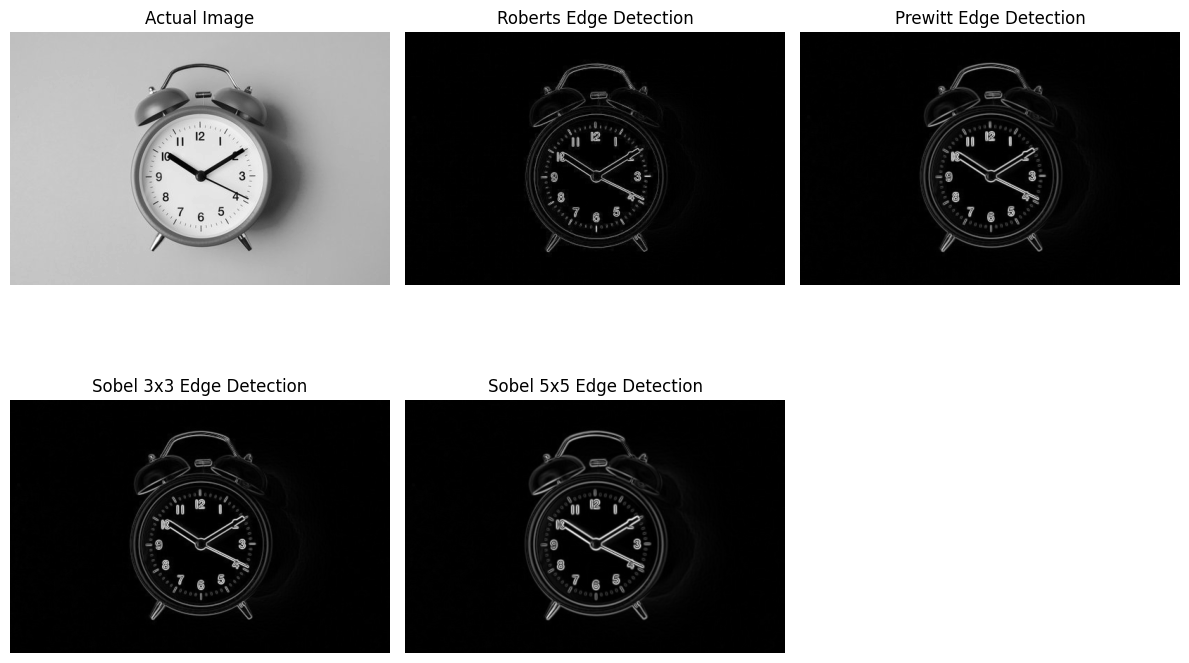

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('../../Image Processing Labs/images/watch.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if image is None:
    raise ValueError("Image not found. Please make sure the path is correct.")

# Convert image to float64 for consistency
image = np.float64(image)

# Apply Roberts Edge Detection
kernel_roberts_x = np.array([[1, 0], [0, -1]], dtype=float)
kernel_roberts_y = np.array([[0, 1], [-1, 0]], dtype=float)

roberts_x = cv2.filter2D(image, -1, kernel_roberts_x)
roberts_y = cv2.filter2D(image, -1, kernel_roberts_y)
roberts_edge = cv2.magnitude(roberts_x, roberts_y)

# Apply Prewitt Edge Detection
kernel_prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=float)
kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=float)

prewitt_x = cv2.filter2D(image, -1, kernel_prewitt_x)
prewitt_y = cv2.filter2D(image, -1, kernel_prewitt_y)
prewitt_edge = cv2.magnitude(prewitt_x, prewitt_y)

# Apply Sobel 3x3 Edge Detection
sobel_x_3x3 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_3x3 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge_3x3 = cv2.magnitude(sobel_x_3x3, sobel_y_3x3)

# Apply Sobel 5x5 Edge Detection
sobel_x_5x5 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y_5x5 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edge_5x5 = cv2.magnitude(sobel_x_5x5, sobel_y_5x5)



# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Actual Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(roberts_edge, cmap='gray')
plt.title("Roberts Edge Detection")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(prewitt_edge, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sobel_edge_3x3, cmap='gray')
plt.title("Sobel 3x3 Edge Detection")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(sobel_edge_5x5, cmap='gray')
plt.title("Sobel 5x5 Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


## Laplasian Edge Detector

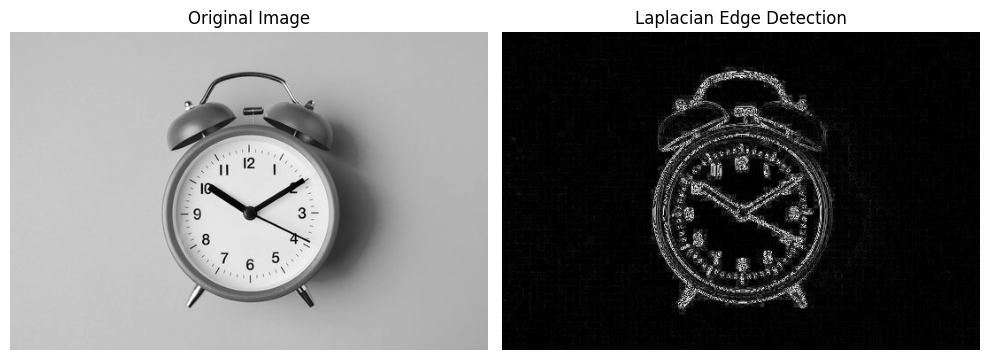

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('../../Image Processing Labs/images/watch.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if image is None:
    raise ValueError("Image not found. Please make sure the path is correct.")

# Apply Laplacian Edge Detection
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)  # ksize can be 1, 3, 5, etc.
laplacian_abs = np.absolute(laplacian)  # Take the absolute value to handle negative values
laplacian_edge = np.uint8(laplacian_abs)  # Convert back to 8-bit for display

# Plotting the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_edge, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


## Canny Edge Detection

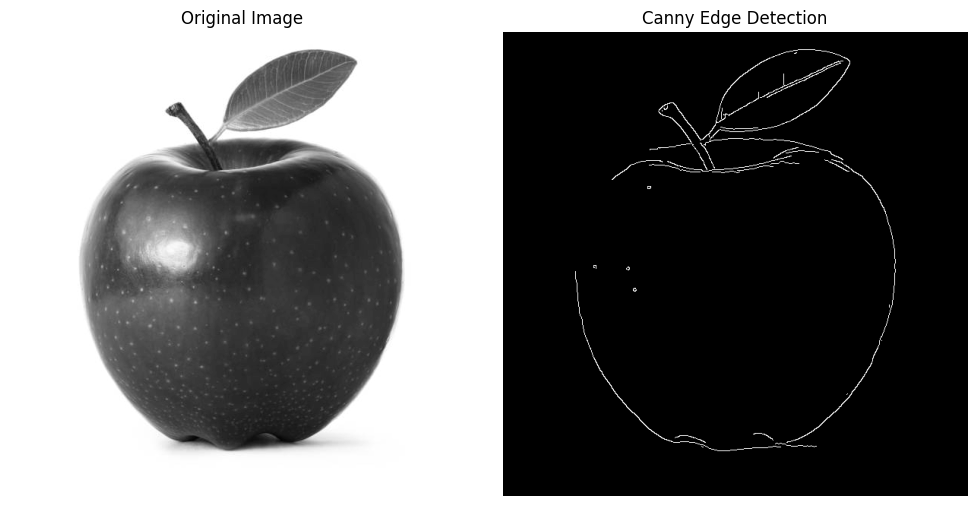

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('../../Image Processing Labs/images/apple.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if image is None:
    raise ValueError("Image not found. Please make sure the path is correct.")

# Step 1: Apply GaussianBlur to reduce noise
# cv2.GaussianBlur(src, ksize, sigmaX)
blurred_image = cv2.GaussianBlur(image, (5, 5), 1)

# Step 2: Apply Canny edge detection
# cv2.Canny(image, threshold1, threshold2, edges=None, apertureSize=None, L2gradient=None)
edges = cv2.Canny(
    blurred_image,  # Input image
    threshold1=50,  # Lower threshold for hysteresis
    threshold2=150, # Upper threshold for hysteresis
    apertureSize=3, # Aperture size for the Sobel operator (default is 3)
    L2gradient=True # If True, uses a more accurate L2 norm (default is False)
)

# Step 3: Plot original and edge-detected images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


## Canny Edge Detection (RAW)

In [11]:
from scipy import ndimage
from scipy.ndimage.filters import convolve

from scipy import misc
import numpy as np

class cannyEdgeDetector:
    # Initialize the detector with parameters and images
    def __init__(self, imgs, sigma=1, kernel_size=5, weak_pixel=75, strong_pixel=255, lowthreshold=0.05, highthreshold=0.15):
        self.imgs = imgs  # List of input images
        self.imgs_final = []  # List to store the final edge-detected images
        self.img_smoothed = None  # Smoothed image after applying Gaussian filter
        self.gradientMat = None  # Gradient magnitude of the image
        self.thetaMat = None  # Gradient direction of the image
        self.nonMaxImg = None  # Image after non-maximum suppression
        self.thresholdImg = None  # Image after applying double thresholding
        self.weak_pixel = weak_pixel  # Intensity value for weak pixels
        self.strong_pixel = strong_pixel  # Intensity value for strong pixels
        self.sigma = sigma  # Standard deviation for Gaussian kernel
        self.kernel_size = kernel_size  # Size of Gaussian kernel
        self.lowThreshold = lowthreshold  # Low threshold for edge detection
        self.highThreshold = highthreshold  # High threshold for edge detection
        return 
    
    # Generate a Gaussian kernel for smoothing
    def gaussian_kernel(self, size, sigma=1):
        size = int(size) // 2  # Ensure kernel size is odd
        x, y = np.mgrid[-size:size+1, -size:size+1]  # Create grid
        normal = 1 / (2.0 * np.pi * sigma**2)  # Normalization factor
        g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal  # Gaussian formula
        return g
    
    # Apply Sobel filters to compute gradients
    def sobel_filters(self, img):
        # Sobel kernels for horizontal and vertical gradients
        Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
        Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

        # Convolve image with Sobel kernels
        Ix = ndimage.filters.convolve(img, Kx)
        Iy = ndimage.filters.convolve(img, Ky)

        # Compute gradient magnitude and normalize
        G = np.hypot(Ix, Iy)
        G = G / G.max() * 255

        # Compute gradient direction
        theta = np.arctan2(Iy, Ix)
        return (G, theta)
    
    # Perform non-maximum suppression to thin edges
    def non_max_suppression(self, img, D):
        M, N = img.shape  # Get dimensions of the image
        Z = np.zeros((M, N), dtype=np.int32)  # Initialize output image
        angle = D * 180. / np.pi  # Convert angles to degrees
        angle[angle < 0] += 180  # Normalize negative angles

        # Iterate through the image, ignoring the border pixels
        for i in range(1, M-1):
            for j in range(1, N-1):
                try:
                    q = 255
                    r = 255

                    # Determine the neighboring pixels based on the angle
                    if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                        q = img[i, j+1]
                        r = img[i, j-1]
                    elif (22.5 <= angle[i, j] < 67.5):
                        q = img[i+1, j-1]
                        r = img[i-1, j+1]
                    elif (67.5 <= angle[i, j] < 112.5):
                        q = img[i+1, j]
                        r = img[i-1, j]
                    elif (112.5 <= angle[i, j] < 157.5):
                        q = img[i-1, j-1]
                        r = img[i+1, j+1]

                    # Keep the pixel if it's a local maximum
                    if (img[i, j] >= q) and (img[i, j] >= r):
                        Z[i, j] = img[i, j]
                    else:
                        Z[i, j] = 0
                except IndexError as e:
                    pass

        return Z

    # Apply double thresholding to categorize pixels as strong, weak, or non-edge
    def threshold(self, img):
        highThreshold = img.max() * self.highThreshold  # High threshold value
        lowThreshold = highThreshold * self.lowThreshold  # Low threshold value

        M, N = img.shape
        res = np.zeros((M, N), dtype=np.int32)

        weak = np.int32(self.weak_pixel)
        strong = np.int32(self.strong_pixel)

        # Identify strong, weak, and non-edge pixels
        strong_i, strong_j = np.where(img >= highThreshold)
        zeros_i, zeros_j = np.where(img < lowThreshold)
        weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

        res[strong_i, strong_j] = strong
        res[weak_i, weak_j] = weak

        return res

    # Perform hysteresis to finalize edge tracking
    def hysteresis(self, img):
        M, N = img.shape
        weak = self.weak_pixel
        strong = self.strong_pixel

        # Iterate through the image, promoting weak edges connected to strong edges
        for i in range(1, M-1):
            for j in range(1, N-1):
                if (img[i, j] == weak):
                    try:
                        # Check 8-connected neighbors for strong pixels
                        if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                            or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                            or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                            img[i, j] = strong
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass

        return img
    
    # Main function to detect edges in all provided images
    def detect(self):
        imgs_final = []
        for i, img in enumerate(self.imgs):    
            # Apply Gaussian smoothing
            self.img_smoothed = convolve(img, self.gaussian_kernel(self.kernel_size, self.sigma))
            # Compute gradient magnitude and direction
            self.gradientMat, self.thetaMat = self.sobel_filters(self.img_smoothed)
            # Apply non-maximum suppression
            self.nonMaxImg = self.non_max_suppression(self.gradientMat, self.thetaMat)
            # Apply double thresholding
            self.thresholdImg = self.threshold(self.nonMaxImg)
            # Perform hysteresis to finalize edges
            img_final = self.hysteresis(self.thresholdImg)
            self.imgs_final.append(img_final)

        return self.imgs_final


/tmp/ipykernel_46991/904884943.py:2: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [12]:
import numpy as np
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def load_data(dir_name = 'faces_imgs'):    
    '''
    Load images from the "faces_imgs" directory
    Images are in JPG and we convert it to gray scale images
    '''
    imgs = []
    for filename in os.listdir(dir_name):
        if os.path.isfile(dir_name + '/' + filename):
            img = mpimg.imread(dir_name + '/' + filename)
            img = rgb2gray(img)
            imgs.append(img)
    return imgs

def visualize(imgs, format=None, gray=False):
    plt.figure(figsize=(20, 15))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(2, 2, plt_idx)
        plt.imshow(img, format)
        plt.axis('off')
        
    plt.show()

    

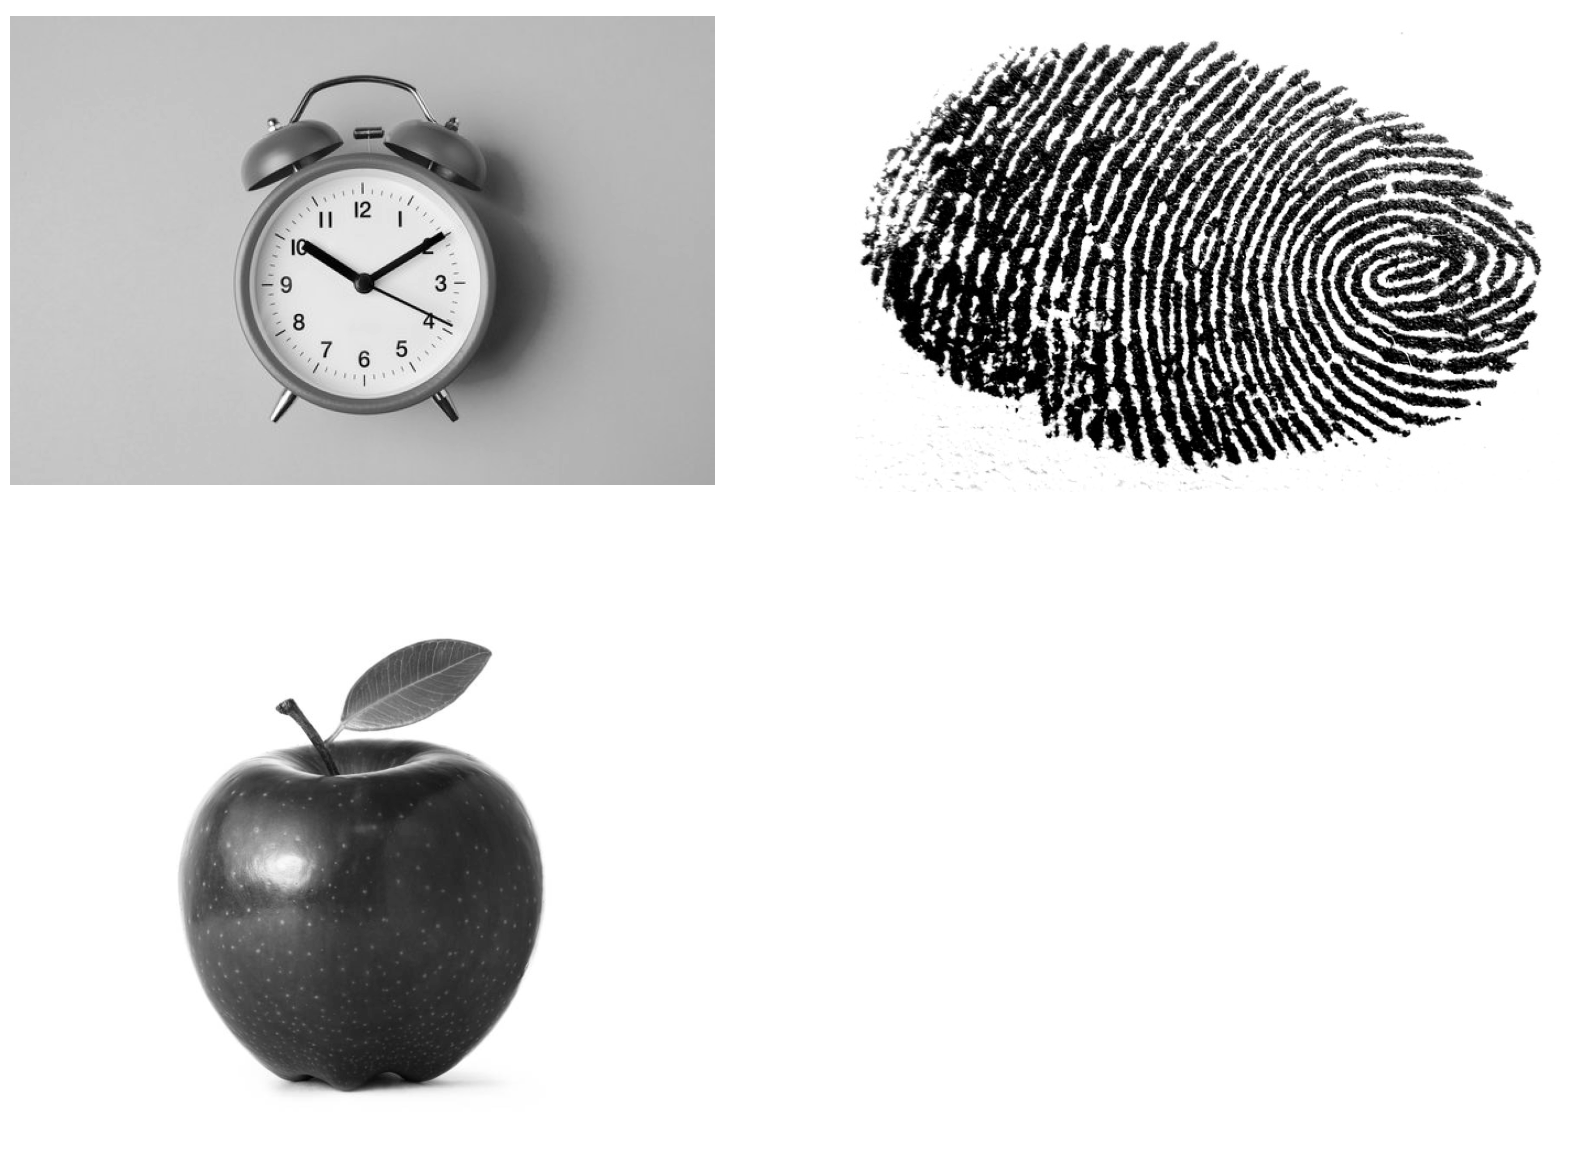

In [13]:
%matplotlib inline

imgs = load_data('../../Image Processing Labs/images/')
visualize(imgs[2:5], 'gray')

In [14]:
detector = cannyEdgeDetector(imgs, sigma=1.4, kernel_size=5, lowthreshold=0.09, highthreshold=0.17, weak_pixel=100)
imgs_final = detector.detect()


/tmp/ipykernel_46991/904884943.py:40: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Ix = ndimage.filters.convolve(img, Kx)
/tmp/ipykernel_46991/904884943.py:41: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Iy = ndimage.filters.convolve(img, Ky)


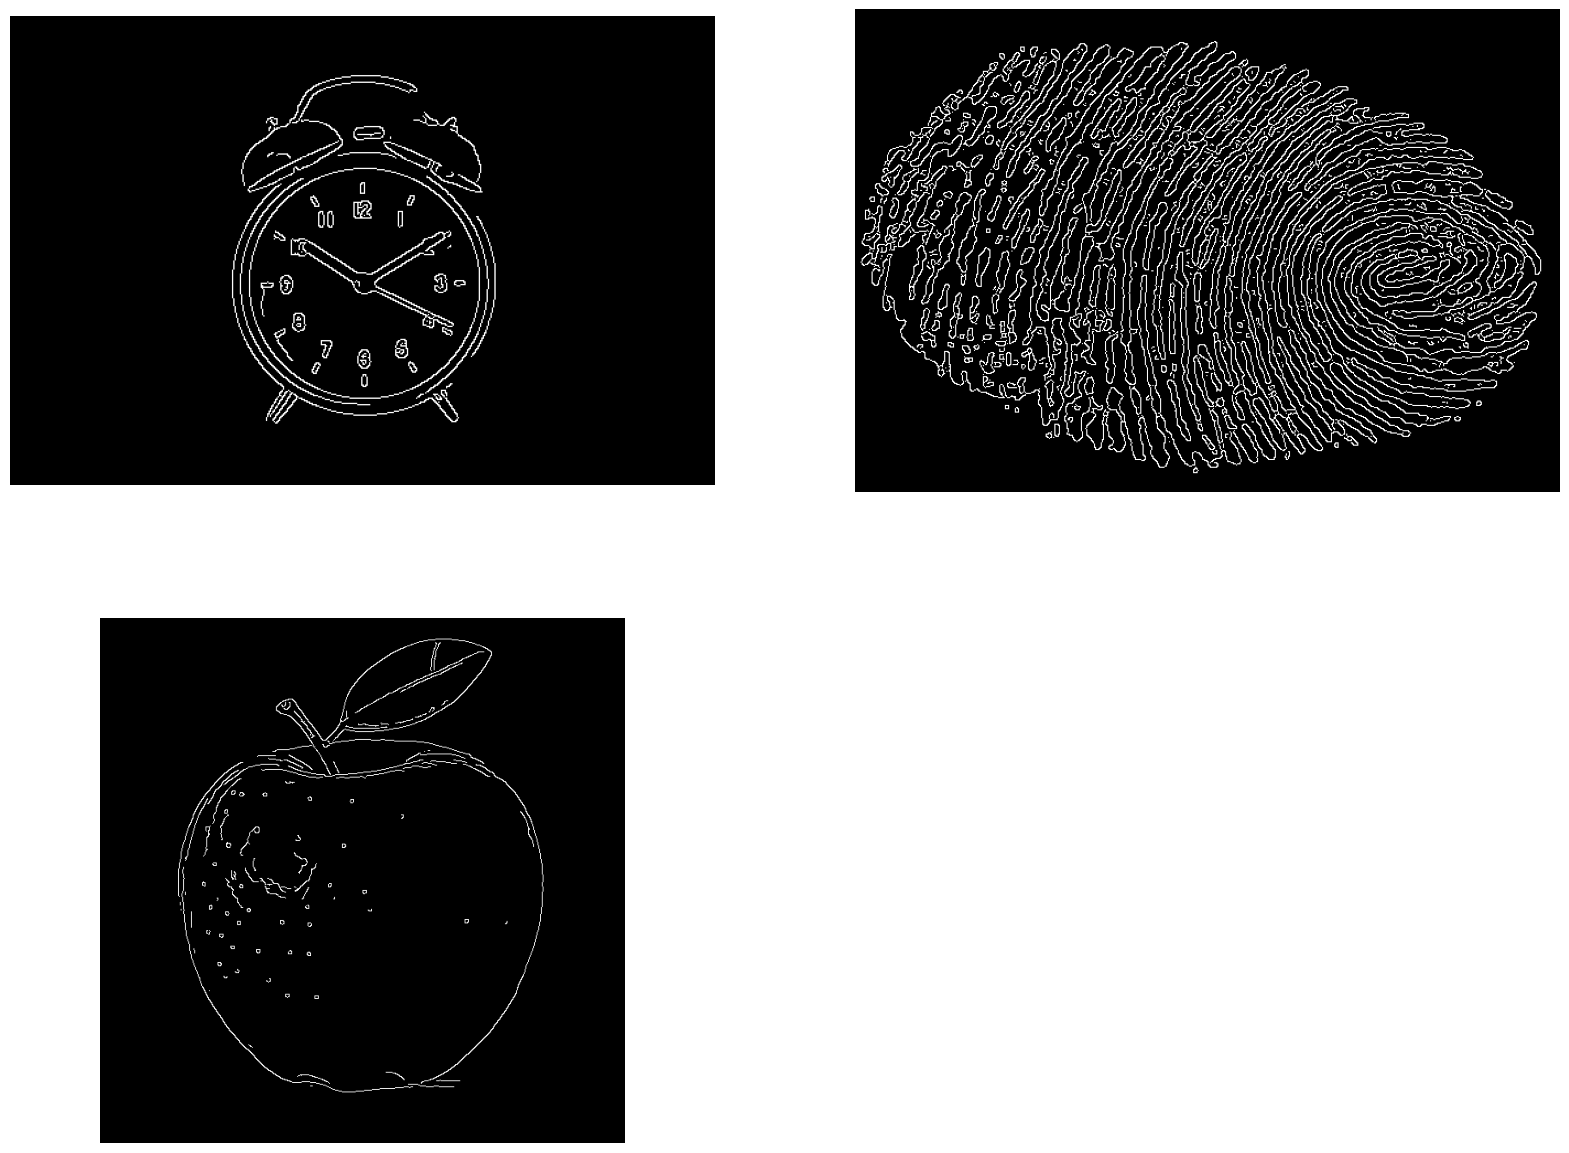

In [17]:
visualize(imgs_final[2:5], 'gray')